# Lane Emden Equation

$\frac{d}{d\xi}(\xi^2\frac{d\theta}{d\xi})=-\xi^2\theta^n$

##### Substitute variables:

x = $\xi$

y = $\theta$

z = $\frac{d\theta}{d\xi}$

##### thus the equation becomes

$\frac{d}{dx}(x^2\frac{dy}{dx})=-x^2y^n$

##### Expanding the equation we get

$x^2\frac{d^2y}{dx^2}+2x\frac{dy}{dx}+x^2y^n=0$

##### We write this as two first order equations by setting 
$z=\frac{dy}{dx}$

##### The two equations become

$\frac{dy}{dx}=z$

$\frac{dz}{dx}=-\frac{1}{x^2}(2xz+x^2y^n)$

### I'm pretty sure the first cell is a correct step in the right direction, but I get confused in the code for graphing it. I've searched online trying to find a code that makes sense and I can attempt to replicate, none of them seem to work. 

In [22]:
import numpy as np
import matplotlib.pyplot as plt

n = [1.5,3]

theta0 = 1
phi0 = 0
step = 0.01
xi0 = 0
xi_max = 100

theta = theta0
phi = phi0
xi = xi0 + step

Theta = [[],[]]
Phi = [[],[]]
Xi = [[],[]]

for i in n:
    Theta[i].append(theta)
    Phi[i].append(phi)
    Xi[i].append(xi)
    
    
for i in n: 
    while xi < xi_max:
        if theta < 0:
            break
        dTheta = (step/6)*(dTheta_dXi(phi,xi)+2*r2(phi,xi)+2*r3(phi,xi)+r4(phi,xi))
        dPhi = (step/6)*(dPhi_dXi(theta,xi,i/2.)+2*k2(theta,xi,n)+2*k3(theta,xi,n)+k4(theta,xi,n))
        theta += dTheta
        phi += dPhi
        xi += step
        Theta[i].append(theta)
        Phi[i].append(phi)
        Xi[i].append(xi)
print (i/2)
theta = theta0
phi = phi0
xi = xi0 + step

TypeError: list indices must be integers or slices, not float

In [34]:
%matplotlib
import seaborn as sns
sns.set_palette("magma",8)

Using matplotlib backend: <object object at 0x000002D50B2B3880>


In [7]:
dxi = 0.01
N = 1000

for n in range (8):
    xi=0.01
    theta=1.0
    f1=0.0
    theta_sol = []
    xi_sol = []
    for i in range (N):
        f1 += -xi**2*theta**(n)*dxi
        theta += f1/xi**2*dxi
        xi += dxi
        theta_sol.append(theta)
        xi_sol.append(xi)
    
fig = p.plot(xi_sol,theta_sol)

xlim(0,10)
ylim(-1,1)
axhline(y=0.0,c="black")
show()

TypeError: plot() takes 1 positional argument but 3 were given

## After lots of trial, error, and research, I think I figured out a solution that works below. 

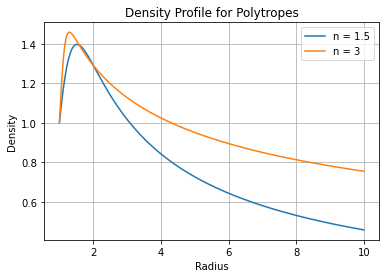

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants and initial conditions
n_values = [1.5, 3]
G = 1.0  # Gravitational constant
n_steps = 1000  # Number of integration steps
r_max = 10.0  # Maximum radius
dr = r_max / n_steps  # Step size
rho_0 = 1.0  # Initial density at r=0

# Initialize arrays to store results
r_values = np.linspace(1, r_max, n_steps)
rho_profiles = {}

# Euler method integration function
def euler_integration(n):
    rho = np.zeros(n_steps)
    rho[0] = rho_0

    for i in range(1, n_steps):
        rho[i] = rho[i - 1] + dr * ((n + 1) * rho[i - 1] / r_values[i - 1] - rho[i - 1] ** (n + 1))
    
    return rho

# Perform integration for each n value
for n in n_values:
    rho_profiles[n] = euler_integration(n)

# Plot the density profiles
plt.figure()
for n in n_values:
    plt.plot(r_values, rho_profiles[n], label=f'n = {n}')
plt.xlabel('Radius')
plt.ylabel('Density')
plt.title('Density Profile for Polytropes')
plt.legend()
plt.grid()
plt.show()

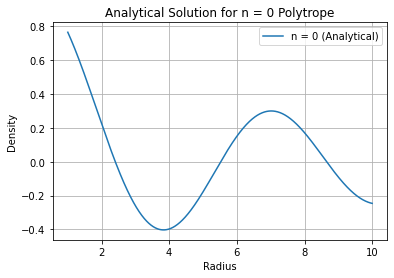

In [2]:
from scipy.special import jn  # Bessel function for n=0

# Analytical solution for n=0 (Lane-Emden function)
def lane_emden_solution(n, r_values):
    if n == 0:
        return jn(0, r_values)  # Bessel function of order 0
    else:
        return None

# Plot the analytical solution for n=0
n = 0
analytical_solution = lane_emden_solution(n, r_values)

plt.figure()
plt.plot(r_values, analytical_solution, label=f'n = {n} (Analytical)')
plt.xlabel('Radius')
plt.ylabel('Density')
plt.title('Analytical Solution for n = 0 Polytrope')
plt.legend()
plt.grid()
plt.show()